In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,normalize
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize,RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
import warnings
import plotly.express as px 
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer

In [79]:
df = pd.read_csv('C:/Users/SIMPLON/Desktop/flickr/flickr_data.csv',delimiter=',', encoding='utf8', error_bad_lines=False)

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


In [80]:
df.head()

id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23277598065  132999708@N08  46.027633  4.699855   
3  22883485267  132999708@N08  46.027572  4.699966   
4  23249102166  133835212@N03  45.699105  4.474932   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                                NaN   
3                                                NaN   
4        sunset,sky,cloud,sun,soleil,coucherdesoleil   

                                               title   date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                  46   
1  https://www.facebook.com/PascalFrontiPhotograp...                   3   
2                         compagnons_dev_arnas20 (1)                   0   
3                         compagnons_dev_arnas20 (3)                   1   
4                 Un soir dans les Monts du Lyonnais                  20   

    date_taken_hour   date_taken_day   date_taken_month   date_taken_year  \
0                18               24                 11              2015   
1                17               24                 11              2015   
2                15                7                 11              2015   
3                15                7                 11              2015   
4                20               31                  8              2015   

    date_upload_minute   date_upload_hour   date_upload_day  \
0                   46                 18                24   
1                    3                 17                24   
2                   50                 15                24   
3                   50                 15                24   
4                   50                 13                24   

    date_upload_month   date_upload_year  
0                  11               2015  
1                  11               2015  
2                  11               2015  
3                  11               2015  
4                  11               2015

In [81]:
df.columns=[col.replace(' ','') for col in df.columns]

In [82]:
df.shape

(83837, 16)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83837 entries, 0 to 83836
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  83837 non-null  int64  
 1   user                83837 non-null  object 
 2   lat                 83837 non-null  float64
 3   long                83837 non-null  float64
 4   tags                72076 non-null  object 
 5   title               79009 non-null  object 
 6   date_taken_minute   83837 non-null  int64  
 7   date_taken_hour     83837 non-null  int64  
 8   date_taken_day      83837 non-null  int64  
 9   date_taken_month    83837 non-null  int64  
 10  date_taken_year     83837 non-null  int64  
 11  date_upload_minute  83837 non-null  int64  
 12  date_upload_hour    83837 non-null  int64  
 13  date_upload_day     83837 non-null  int64  
 14  date_upload_month   83837 non-null  int64  
 15  date_upload_year    83837 non-null  int64  
dtypes: f

In [84]:
df.isna().sum()

id                        0
user                      0
lat                       0
long                      0
tags                  11761
title                  4828
date_taken_minute         0
date_taken_hour           0
date_taken_day            0
date_taken_month          0
date_taken_year           0
date_upload_minute        0
date_upload_hour          0
date_upload_day           0
date_upload_month         0
date_upload_year          0
dtype: int64

In [85]:
df.isnull().sum()

id                        0
user                      0
lat                       0
long                      0
tags                  11761
title                  4828
date_taken_minute         0
date_taken_hour           0
date_taken_day            0
date_taken_month          0
date_taken_year           0
date_upload_minute        0
date_upload_hour          0
date_upload_day           0
date_upload_month         0
date_upload_year          0
dtype: int64

In [10]:
num_columns = df.columns[df.dtypes != 'object']
cat_columns = df.columns[df.dtypes == 'object']

print(num_columns, num_columns.shape)
print(cat_columns, cat_columns.shape)

Index(['id', 'lat', 'long', 'date_taken_minute', 'date_taken_hour',
       'date_taken_day', 'date_taken_month', 'date_taken_year',
       'date_upload_minute', 'date_upload_hour', 'date_upload_day',
       'date_upload_month', 'date_upload_year'],
      dtype='object') (13,)
Index(['user', 'tags', 'title'], dtype='object') (3,)


In [11]:
#sns.pairplot(df)

In [12]:
df.duplicated().sum()

68635

In [87]:
(df.duplicated().value_counts()/len(df))*100


True     81.867195
False    18.132805
dtype: float64

<AxesSubplot:ylabel='None'>

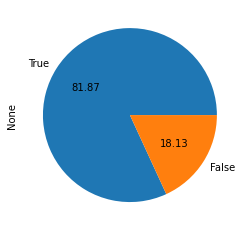

In [14]:
df.duplicated().value_counts().plot.pie(autopct='%.2f')

In [88]:
(~df.duplicated()).sum()

15202

In [89]:
print(df.duplicated(keep=False).value_counts())

True     73746
False    10091
dtype: int64


In [90]:
df2=df.drop_duplicates()

In [91]:
df2.shape

(15202, 16)

In [92]:
df2.head()

id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23277598065  132999708@N08  46.027633  4.699855   
3  22883485267  132999708@N08  46.027572  4.699966   
4  23249102166  133835212@N03  45.699105  4.474932   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                                NaN   
3                                                NaN   
4        sunset,sky,cloud,sun,soleil,coucherdesoleil   

                                               title  date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                 46   
1  https://www.facebook.com/PascalFrontiPhotograp...                  3   
2                         compagnons_dev_arnas20 (1)                  0   
3                         compagnons_dev_arnas20 (3)                  1   
4                 Un soir dans les Monts du Lyonnais                 20   

   date_taken_hour  date_taken_day  date_taken_month  date_taken_year  \
0               18              24                11             2015   
1               17              24                11             2015   
2               15               7                11             2015   
3               15               7                11             2015   
4               20              31                 8             2015   

   date_upload_minute  date_upload_hour  date_upload_day  date_upload_month  \
0                  46                18               24                 11   
1                   3                17               24                 11   
2                  50                15               24                 11   
3                  50                15               24                 11   
4                  50                13               24                 11   

   date_upload_year  
0              2015  
1              2015  
2              2015  
3              2015  
4              2015

In [93]:
df2.isna().sum()

id                       0
user                     0
lat                      0
long                     0
tags                  3982
title                 1616
date_taken_minute        0
date_taken_hour          0
date_taken_day           0
date_taken_month         0
date_taken_year          0
date_upload_minute       0
date_upload_hour         0
date_upload_day          0
date_upload_month        0
date_upload_year         0
dtype: int64

In [94]:
#outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
((df2[df2.columns ]< (Q1 - 1.5 * IQR)) | (df2[df2.columns] > (Q3 + 1.5 * IQR))).sum()

date_taken_day           0
date_taken_hour        556
date_taken_minute        0
date_taken_month         0
date_taken_year        807
date_upload_day          0
date_upload_hour         0
date_upload_minute       0
date_upload_month     2261
date_upload_year         0
id                       3
lat                   3204
long                  2466
tags                     0
title                    0
user                     0
dtype: int64

In [95]:
num_columns = df2.columns[df.dtypes != 'object']
cat_columns = df2.columns[df.dtypes == 'object']
cat_columns

Index(['user', 'tags', 'title'], dtype='object')

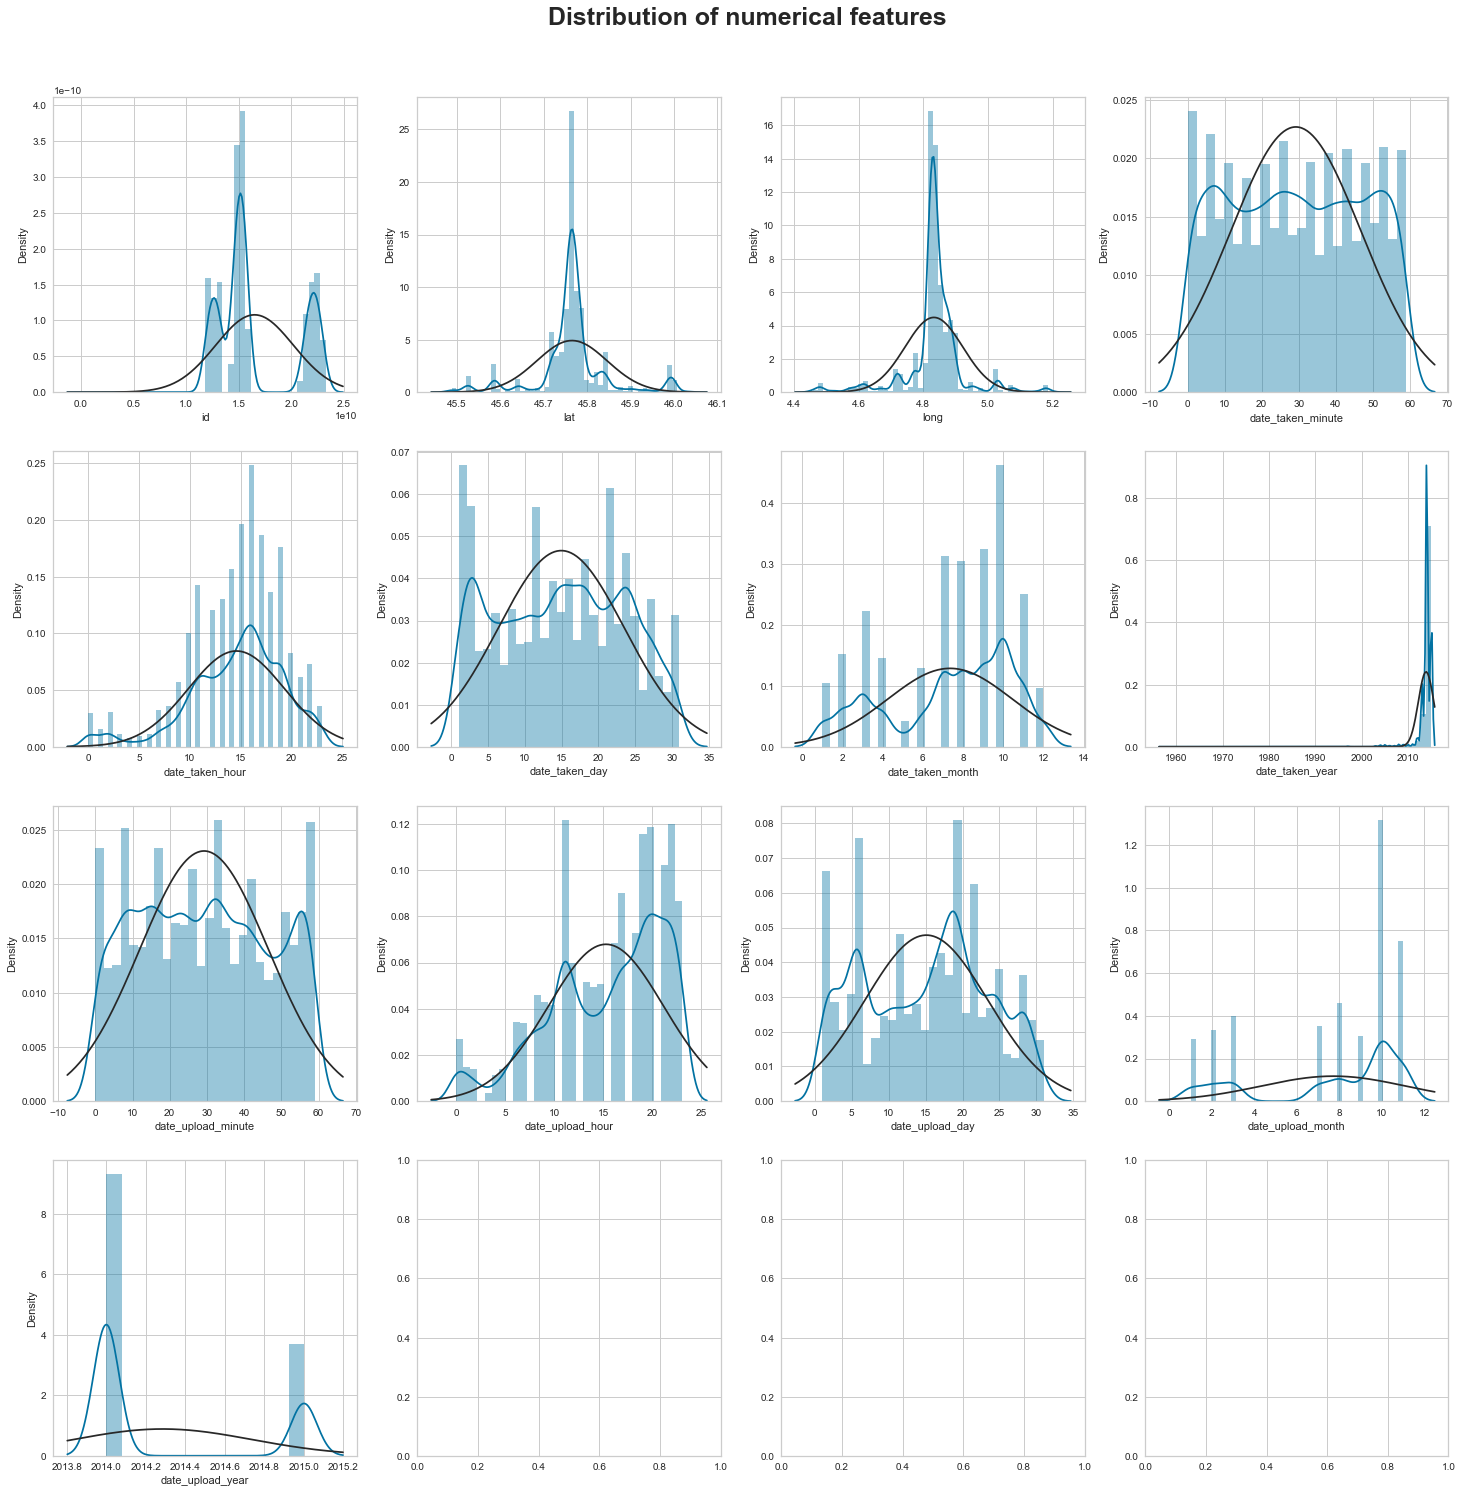

In [96]:
figure1, ax = plt.subplots(4,4, figsize = (25,25))
for i, j in enumerate(num_columns):
    sns.distplot(df2[j], fit=norm, ax = ax[i//4, i%4])
figure1.text(0.4,.92, 'Distribution of numerical features', size = 25, weight = 'bold')
plt.show(figure1)

In [97]:
loc=df2[["lat","long"]]


In [98]:
from sklearn.preprocessing import  RobustScaler
loc=df2[["lat","long"]]
rs=RobustScaler()
loc=rs.fit_transform(loc)


In [99]:
norm=normalize(loc)
df_norm=pd.DataFrame(norm)

In [100]:
#!pip install yellowbrick

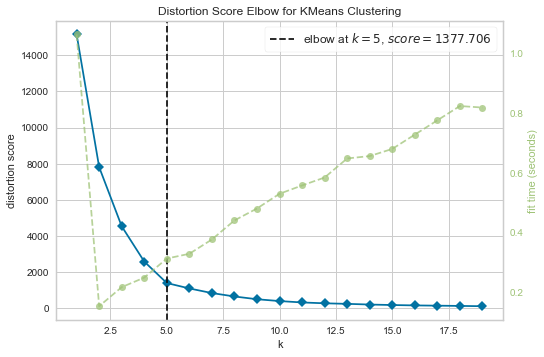

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_norm)      
visualizer.show()

In [30]:
for i in range(2,8):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 2 clusters k-means : 0.482 
Silhouette score for 3 clusters k-means : 0.501 
Silhouette score for 4 clusters k-means : 0.54 
Silhouette score for 5 clusters k-means : 0.604 
Silhouette score for 6 clusters k-means : 0.592 
Silhouette score for 7 clusters k-means : 0.588 


In [106]:
model = KMeans(n_clusters=5,init='k-means++').fit(df_norm)
ypred=model.labels_

In [107]:
df2["clusters"]=ypred

In [101]:
location=[]
for index,rows in df2.iterrows():
    location.append((rows.lat,rows.long))


In [77]:
#pip install folium

In [103]:
import folium
for index,rows in df2.iterrows():
    m=folium.Map(location=[rows.lat,rows.long],popup='Timberline Lodge')
    folium.Marker(location=[rows.lat,rows.long],popup='Default popup Marker1',tooltip=df2.tags).add_to(m)
m

In [109]:
fig = px.scatter_mapbox(df2,lat='lat',lon='long', hover_name="id", mapbox_style='open-street-map',color='clusters')
fig.update_layout(title = 'Ville de Lyon', title_x=0.5)
fig.show()

In [ ]:
cluster1=df2[df2.clusters==0]
cluster1.id.value_counts()

In [ ]:
df2.tags.value_counts()

In [ ]:
df2.id.value_counts()

In [36]:
df_p= pd.read_csv('C:/Users/SIMPLON/Desktop/flickr/flickr_data_processed.csv',delimiter=',', encoding='utf8', error_bad_lines=False)

In [37]:
df_p.head()

Unnamed: 0           id           user        lat      long  \
0           0  22653655033   77161041@N00  45.768121  4.801776   
1           1  22884818287  113280318@N03  45.759700  4.842200   
2           2  23277598065  132999708@N08  46.027633  4.699855   
3           3  22883485267  132999708@N08  46.027572  4.699966   
4           4  23249102166  133835212@N03  45.699105  4.474932   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                               nan,   
3                                               nan,   
4       sunset,sky,cloud,sun,soleil,coucherdesoleil,   

                                               title  \
0             Enfin. #instabeer #beer #chimay #apero   
1  https://www.facebook.com/PascalFrontiPhotograp...   
2                         compagnons_dev_arnas20 (1)   
3                         compagnons_dev_arnas20 (3)   
4                 Un soir dans les Monts du Lyonnais   

                 date_upload                 date_taken date_taken_bin  \
0  2015-11-24 18:46:00+00:00  2015-11-24 18:46:00+00:00        evening   
1  2015-11-24 17:03:00+00:00  2015-11-24 17:03:00+00:00      afternoon   
2  2015-11-24 15:50:00+00:00  2015-11-07 15:50:00+00:00      afternoon   
3  2015-11-24 15:50:00+00:00  2015-11-07 15:50:00+00:00      afternoon   
4  2015-11-24 13:50:00+00:00  2015-08-31 20:50:00+00:00        evening   

  date_upload_bin uploaded_via          foursquare_venue  \
0         evening    instagram  4e0462c82271233b767cec75   
1       afternoon    instagram                       NaN   
2       afternoon          NaN                       NaN   
3       afternoon          NaN                       NaN   
4          midday          NaN                       NaN   

                                               links              file_title  \
0                                                NaN                     NaN   
1  https://www.facebook.com/PascalFrontiPhotograp...                     NaN   
2                                                NaN  compagnons_dev_arnas20   
3                                                NaN  compagnons_dev_arnas20   
4                                                NaN                     NaN   

  people_tag  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

# Kmeans avec df_P

In [38]:
df_p.date_taken_bin.value_counts()

afternoon        5686
evening          3809
morning          2173
midday           1810
early morning    1108
night             256
Name: date_taken_bin, dtype: int64

In [39]:
df_p.uploaded_via.value_counts()

instagram       724
flickrmobile    128
flickstagram      1
Name: uploaded_via, dtype: int64

In [41]:
df_p.isna().sum()

Unnamed: 0              0
id                      0
user                    0
lat                     0
long                    0
tags                 1616
title                1616
date_upload             0
date_taken              0
date_taken_bin        218
date_upload_bin       289
uploaded_via        14207
foursquare_venue    14675
links               14441
file_title          12865
people_tag          15011
dtype: int64

In [42]:
df_p.duplicated().value_counts()

False    15060
dtype: int64

In [43]:
#df_p=df_p.dropna()
df_p=df_p.replace (np.NaN, 0)


Unnamed: 0           id           user        lat      long  \
0           0  22653655033   77161041@N00  45.768121  4.801776   
1           1  22884818287  113280318@N03  45.759700  4.842200   
2           2  23277598065  132999708@N08  46.027633  4.699855   
3           3  22883485267  132999708@N08  46.027572  4.699966   
4           4  23249102166  133835212@N03  45.699105  4.474932   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                               nan,   
3                                               nan,   
4       sunset,sky,cloud,sun,soleil,coucherdesoleil,   

                                               title  \
0             Enfin. #instabeer #beer #chimay #apero   
1  https://www.facebook.com/PascalFrontiPhotograp...   
2                         compagnons_dev_arnas20 (1)   
3                         compagnons_dev_arnas20 (3)   
4                 Un soir dans les Monts du Lyonnais   

                 date_upload                 date_taken date_taken_bin  \
0  2015-11-24 18:46:00+00:00  2015-11-24 18:46:00+00:00        evening   
1  2015-11-24 17:03:00+00:00  2015-11-24 17:03:00+00:00      afternoon   
2  2015-11-24 15:50:00+00:00  2015-11-07 15:50:00+00:00      afternoon   
3  2015-11-24 15:50:00+00:00  2015-11-07 15:50:00+00:00      afternoon   
4  2015-11-24 13:50:00+00:00  2015-08-31 20:50:00+00:00        evening   

  date_upload_bin uploaded_via          foursquare_venue  \
0         evening    instagram  4e0462c82271233b767cec75   
1       afternoon    instagram                         0   
2       afternoon            0                         0   
3       afternoon            0                         0   
4          midday            0                         0   

                                               links              file_title  \
0                                                  0                       0   
1  https://www.facebook.com/PascalFrontiPhotograp...                       0   
2                                                  0  compagnons_dev_arnas20   
3                                                  0  compagnons_dev_arnas20   
4                                                  0                       0   

  people_tag  
0          0  
1          0  
2          0  
3          0  
4          0

In [44]:
X=df_p[["lat","long","date_taken_bin","uploaded_via"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lat             15060 non-null  float64
 1   long            15060 non-null  float64
 2   date_taken_bin  15060 non-null  object 
 3   uploaded_via    15060 non-null  object 
dtypes: float64(2), object(2)
memory usage: 470.8+ KB


In [67]:
# make a copy of dataframe
scaled_features = X.copy()

col_names = ['lat','long']
features = scaled_features[col_names]
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
X=scaled_features
X.head()

lat      long date_taken_bin uploaded_via
0  0.164454 -0.825007        evening    instagram
1 -0.094351  0.258456      afternoon    instagram
2  8.140113 -3.556741      afternoon            0
3  8.138238 -3.553766      afternoon            0
4 -1.956635 -9.585232        evening            0

In [76]:
dum = pd.get_dummies(X, columns=['date_taken_bin','uploaded_via'],drop_first=True)


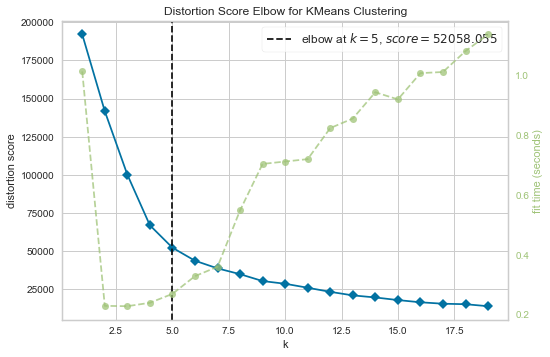

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dum)      
visualizer.show()

In [75]:
model = KMeans(n_clusters=5,init='k-means++').fit(dum)
ypredf=model.labels_
df_p["clusters"]=ypredf